# GRIP -The Sparks Foundation

### Data Science & Business AnalyticsTasks

####  Linear Regression with python and Scikit learn - Predicition using Supervised ML (Task -1)

##### Predict the percentage of an student based on the no. of study hours.
In this regression method we will predict the percentage of the student is expected to score based upon the number of hours they studied. This is a simple Linear Regression task as it involves just two variables.

### Importing requried libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import warnings 
warnings.filterwarnings('ignore')

#### importing dataset from online source

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

### Data Exploration

In [8]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
df.shape

(25, 2)

In [11]:
df.size

50

In [12]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#####  Checking for  missing values

In [16]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [17]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


######  This shows positive correlation between Hours & Scores

###  Data Visualization

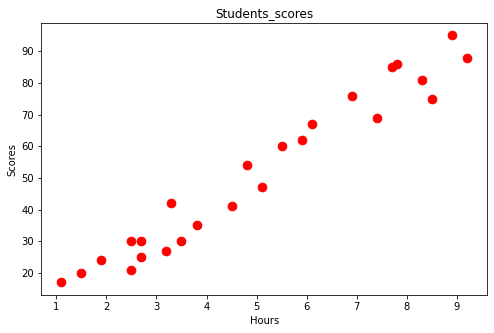

In [18]:

plt.figure(figsize=(8,5))
plt.title("Students_scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(df.Hours,df.Scores,s=75, color='red')
plt.show()

######  By visualization we came to know that this problem can be easily solved by linear regression 

####  Modelling the data

In [19]:
x=np.asanyarray(df[['Hours']])
y=np.asanyarray(df['Scores'])

In [20]:
# using train test split to split the data in train & test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,  )

In [21]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train, y_train)

print ('model training completed succesfully')

model training completed succesfully


In [22]:
print(lm.coef_)

[9.57275105]


In [23]:
print(lm.intercept_)

2.7328386175166415


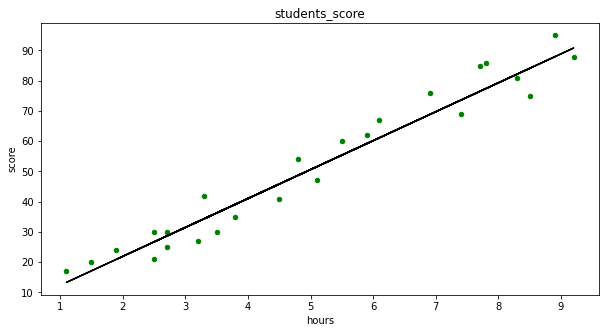

In [24]:
df.plot(kind='scatter', x='Hours',y='Scores',figsize=(10,5),color='g')
plt.plot(x_train,lm.coef_[0]*x_train+lm.intercept_,color='black')
plt.title("students_score")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [25]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from math import sqrt


######  Prediction on test data

In [26]:
y_pred = lm.predict(x_test)

print("R2-Score: %2f" % r2_score(y_pred,y_test))

R2-Score: 0.880707


In [27]:
print('mean absolute error:{}'.format(metrics.mean_absolute_error(y_pred,y_test)))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

mean absolute error:5.664213123573829
MSE: 35.838503251875714
RMSE 5.986526810419854


######  Actual & Prdicted values

In [28]:
e=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
e

,Actual,Predicted
0,86,77.400297
1,30,26.664716
2,76,68.784821
3,60,55.382969
4,47,51.553869


###### prediction on train data

In [29]:
y_pred_train=lm.predict(x_train)
r2_score(y_train,y_pred_train)

0.9563261924705762

In [30]:
MSE=mean_squared_error(y_test,y_pred)
RMSE=sqrt(MSE)

In [31]:
print(MSE)
print(RMSE)

35.838503251875714
5.986526810419854


In [32]:
MSE_train=mean_squared_error(y_train,y_pred_train)
RMSE_train=sqrt(MSE_train)
print(MSE_train)
print(RMSE_train)

28.197557093297217
5.310137200986168


###### What will be predicted score if a student studies for 9.25 hrs/ day

In [35]:
hours=9.25
pred_score=lm.predict([[hours]])
print(f'no of hours = {hours}')
print(f'predicted_score ={pred_score[0]}')

no of hours = 9.25
predicted_score =91.2807858560748
